In [1]:
#%% Import Moduels

## System Tools
from _Public import *

import seaborn as sns
import matplotlib.backends.backend_pdf as figpdf
import matplotlib.dates as matdates
import pyfixest as pf
from binsreg import *

## Output Folder
OutputFolder = 'Micro_data/results/Analysis_PriceChange/'
if not os.path.exists(OutputFolder):
    os.makedirs(OutputFolder)
## Self-written Modules
import Toolkit_TimeSeries as MyTS
import Toolkit_Graphics as MyGR

# Load in the data

In [2]:
DataFolder = "Micro_data\\datasets\\SDC\\"

In [3]:
DS = pd.read_pickle(DataFolder + "PriceChange.p")

In [4]:
# Generate relevant variables
DS['Overlap_FL'] = (DS['GapBusDays_F2L']<=1) * 1
DS['Overlap_LI'] = (DS['GapBusDays_L2I']<=1) * 1

# Compare different price changes

In [5]:
PctList = [0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995]

## First event vs. All event

In [6]:
DS.loc[:, ['PC_Total_Event', 'PC_FirstEvent']].describe(percentiles=PctList)

,PC_Total_Event,PC_FirstEvent
count,3510.000000,3510.000000
mean,-0.045290,-0.033685
std,0.124770,0.091525
min,-1.417302,-0.567984
0.5%,-0.542494,-0.400664
1%,-0.435046,-0.344860
5%,-0.248144,-0.178514
10%,-0.174237,-0.127032
25%,-0.095310,-0.068264
50%,-0.032889,-0.024989


## Relevance of different events

In [7]:
TempList = ['PC_NonExcl_'+vv for vv in ['F', 'L', 'I']] + ['PC_FirstEvent', 'PC_Total_Event']
PC_NonExcl_Stat = pd.concat([DS.groupby(['ShelfIssueFlag', 'Overlap_FL', 'Overlap_LI'])[vv] \
                            .apply(lambda x: KeyRetStat(x)).unstack(level=-1) for vv in TempList], \
                            axis=1, join='outer', keys=TempList).sort_index(axis=1)


In [8]:
PC_NonExcl_Stat.to_excel(OutputFolder+'PC_NonExcl_Stat.xlsx')

In [9]:
PC_NonExcl_MainStat = PC_NonExcl_Stat.loc[:, idx[:, ['count', 'mean', '50%']]].sort_index(axis=1) \
                                     .loc[:, idx[TempList, ['mean', '50%']]]

In [10]:
PC_NonExcl_MainStat

PC_NonExcl_F           PC_NonExcl_L  \
                                             mean       50%         mean   
ShelfIssueFlag Overlap_FL Overlap_LI                                       
0.0            0          0             -0.029796 -0.013744    -0.067864   
                          1             -0.020526 -0.009303    -0.081425   
               1          0             -0.024732 -0.019324    -0.024749   
                          1             -0.049831 -0.048253    -0.050942   
1.0            0          0             -0.002603 -0.001130    -0.037880   
                          1             -0.009377 -0.007128    -0.050542   
               1          0             -0.018667 -0.017250    -0.019166   
                          1             -0.036127 -0.038250    -0.035338   

                                               PC_NonExcl_I            \
                                           50%         mean       50%   
ShelfIssueFlag Overlap_FL Overlap_LI                                    
0.0            0          0          -0.045672    -0.010132 -0.017858   
                          1          -0.059868    -0.073266 -0.043705   
               1          0          -0.019418    -0.012988 -0.003075   
                          1          -0.048910    -0.060011 -0.045120   
1.0            0          0          -0.027663    -0.005220 -0.004124   
                          1          -0.039132    -0.047334 -0.036709   
               1          0          -0.016932    -0.019169 -0.010726   
                          1          -0.039170    -0.028460 -0.034871   

                                     PC_FirstEvent           PC_Total_Event  \
                                              mean       50%           mean   
ShelfIssueFlag Overlap_FL Overlap_LI                                          
0.0            0          0              -0.029796 -0.013744      -0.108649   
                          1              -0.020526 -0.009303      -0.099342   
               1          0              -0.024732 -0.019324      -0.037424   
                          1              -0.049831 -0.048253      -0.052852   
1.0            0          0              -0.037880 -0.027663      -0.042645   
                          1              -0.050542 -0.039132      -0.050100   
               1          0              -0.019166 -0.016932      -0.038682   
                          1              -0.035338 -0.039170      -0.029368   

                                                
                                           50%  
ShelfIssueFlag Overlap_FL Overlap_LI            
0.0            0          0          -0.095859  
                          1          -0.069016  
               1          0          -0.025449  
                          1          -0.044494  
1.0            0          0          -0.030814  
                          1          -0.039311  
               1          0          -0.028166  
                          1          -0.036053

In [11]:
PC_NonExcl_MainStat.to_latex(OutputFolder+'PC_NonExcl_MainStat.tex', float_format="%.3g", escape=True)

In [12]:
PC_NonExcl_MainStat_Share = PC_NonExcl_MainStat.copy()
for vv in TempList:
    for cc in ['mean', '50%']:
        PC_NonExcl_MainStat_Share.loc[:, (vv, cc)] = PC_NonExcl_MainStat.loc[:, (vv, cc)]/PC_NonExcl_MainStat.loc[:, ('PC_Total_Event', cc)]


In [13]:
PC_NonExcl_MainStat_Share

PC_NonExcl_F           PC_NonExcl_L  \
                                             mean       50%         mean   
ShelfIssueFlag Overlap_FL Overlap_LI                                       
0.0            0          0              0.274246  0.143381     0.624621   
                          1              0.206616  0.134794     0.819648   
               1          0              0.660860  0.759345     0.661322   
                          1              0.942829  1.084485     0.963857   
1.0            0          0              0.061034  0.036671     0.888259   
                          1              0.187165  0.181320     1.008809   
               1          0              0.482579  0.612460     0.495458   
                          1              1.230133  1.060948     1.203252   

                                               PC_NonExcl_I            \
                                           50%         mean       50%   
ShelfIssueFlag Overlap_FL Overlap_LI                                    
0.0            0          0           0.476452     0.093257  0.186291   
                          1           0.867453     0.737511  0.633262   
               1          0           0.763031     0.347046  0.120848   
                          1           1.099241     1.135446  1.014081   
1.0            0          0           0.897737     0.122398  0.133825   
                          1           0.995438     0.944796  0.933797   
               1          0           0.601165     0.495547  0.380835   
                          1           1.086462     0.969064  0.967228   

                                     PC_FirstEvent           PC_Total_Event  \
                                              mean       50%           mean   
ShelfIssueFlag Overlap_FL Overlap_LI                                          
0.0            0          0               0.274246  0.143381            1.0   
                          1               0.206616  0.134794            1.0   
               1          0               0.660860  0.759345            1.0   
                          1               0.942829  1.084485            1.0   
1.0            0          0               0.888259  0.897737            1.0   
                          1               1.008809  0.995438            1.0   
               1          0               0.495458  0.601165            1.0   
                          1               1.203252  1.086462            1.0   

                                           
                                      50%  
ShelfIssueFlag Overlap_FL Overlap_LI       
0.0            0          0           1.0  
                          1           1.0  
               1          0           1.0  
                          1           1.0  
1.0            0          0           1.0  
                          1           1.0  
               1          0           1.0  
                          1           1.0

In [14]:
PC_NonExcl_MainStat_Share.to_latex(OutputFolder+'PC_NonExcl_MainStat_Share.tex', float_format="%.3g", escape=True)

# Investigate the key correlation

In [15]:
TempVarList = ['PC_Total_Event', 'PC_FirstEvent', 's_Share', 's_Funding', 'PC_Runup']

DataForBinScatter = DS[TempVarList].copy()
TempStat = DataForBinScatter.describe(percentiles=PctList)
TempStat 

,PC_Total_Event,PC_FirstEvent,s_Share,s_Funding,PC_Runup
count,3510.000000,3510.000000,3411.000000,3405.000000,3510.000000
mean,-0.045290,-0.033685,18.435262,0.228983,0.202190
std,0.124770,0.091525,982.017991,1.050107,0.518478
min,-1.417302,-0.567984,0.000000,0.000016,-3.220123
0.5%,-0.542494,-0.400664,0.007451,0.009991,-1.541779
1%,-0.435046,-0.344860,0.013844,0.014423,-1.277270
5%,-0.248144,-0.178514,0.039829,0.038131,-0.559331
10%,-0.174237,-0.127032,0.057228,0.055638,-0.318454
25%,-0.095310,-0.068264,0.093640,0.088899,-0.039414
50%,-0.032889,-0.024989,0.148774,0.141440,0.178280


In [16]:
# Winsorize the data 
TempFlag = True 
for vv in ['s_Share', 's_Funding']:
    if TempFlag:
        SampleFlag = DataForBinScatter[vv].between(TempStat.loc['0.5%', vv], TempStat.loc['99.5%', vv])
        TempFlag = False
    else:
        SampleFlag = SampleFlag & DataForBinScatter[vv].between(TempStat.loc['0.5%', vv], TempStat.loc['99.5%', vv])

In [17]:
DataForBinScatter = DataForBinScatter.loc[SampleFlag, :]

In [18]:
def UnitFun_BinScatterData(df, xx, yy):
    temp_est = binsreg(yy, xx, data=df)
    temp_data = temp_est.data_plot[0].dots
    return temp_data[['x', 'fit']]

## Price change vs. issuance size

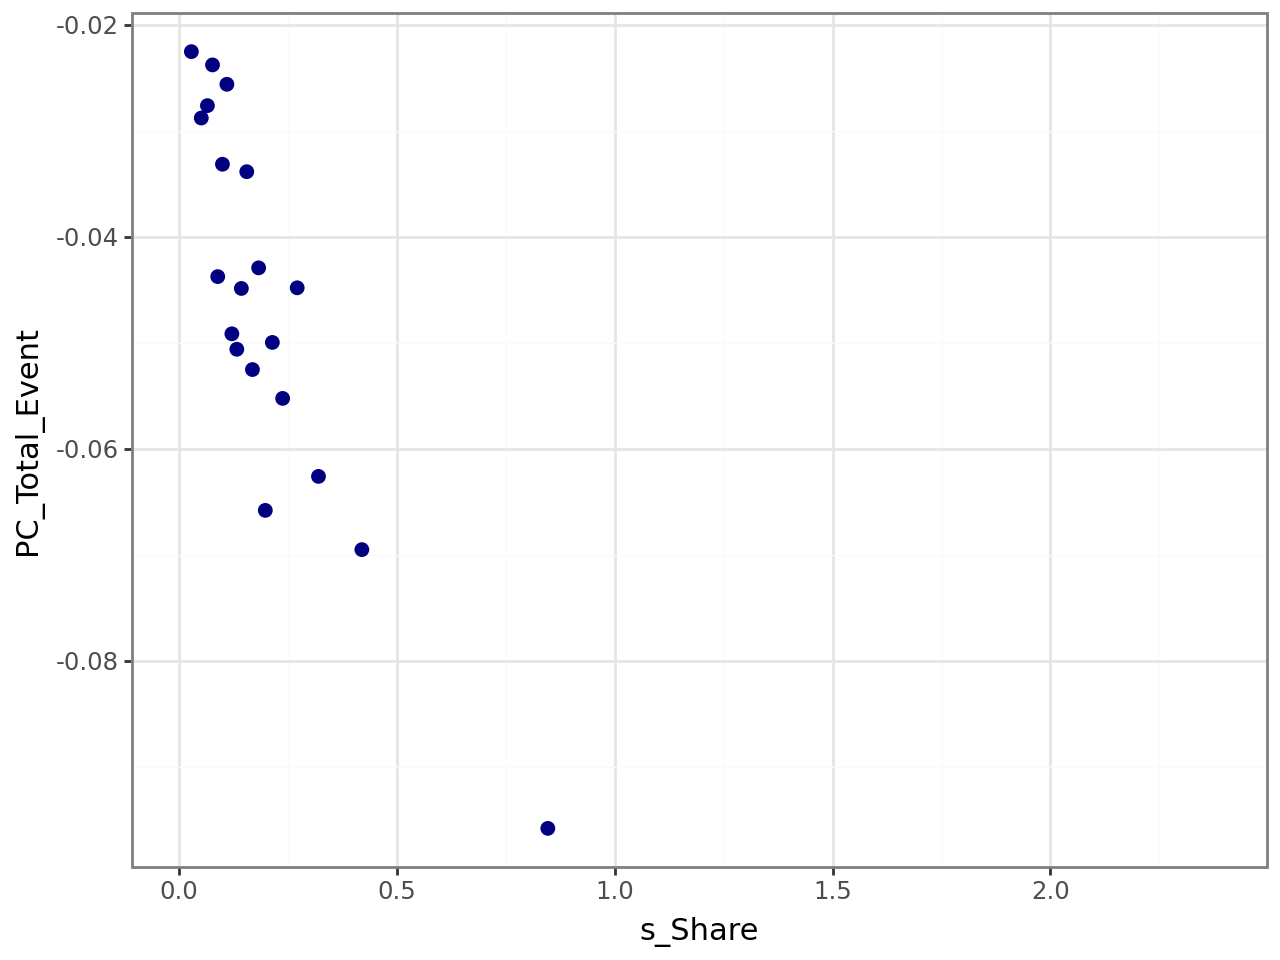

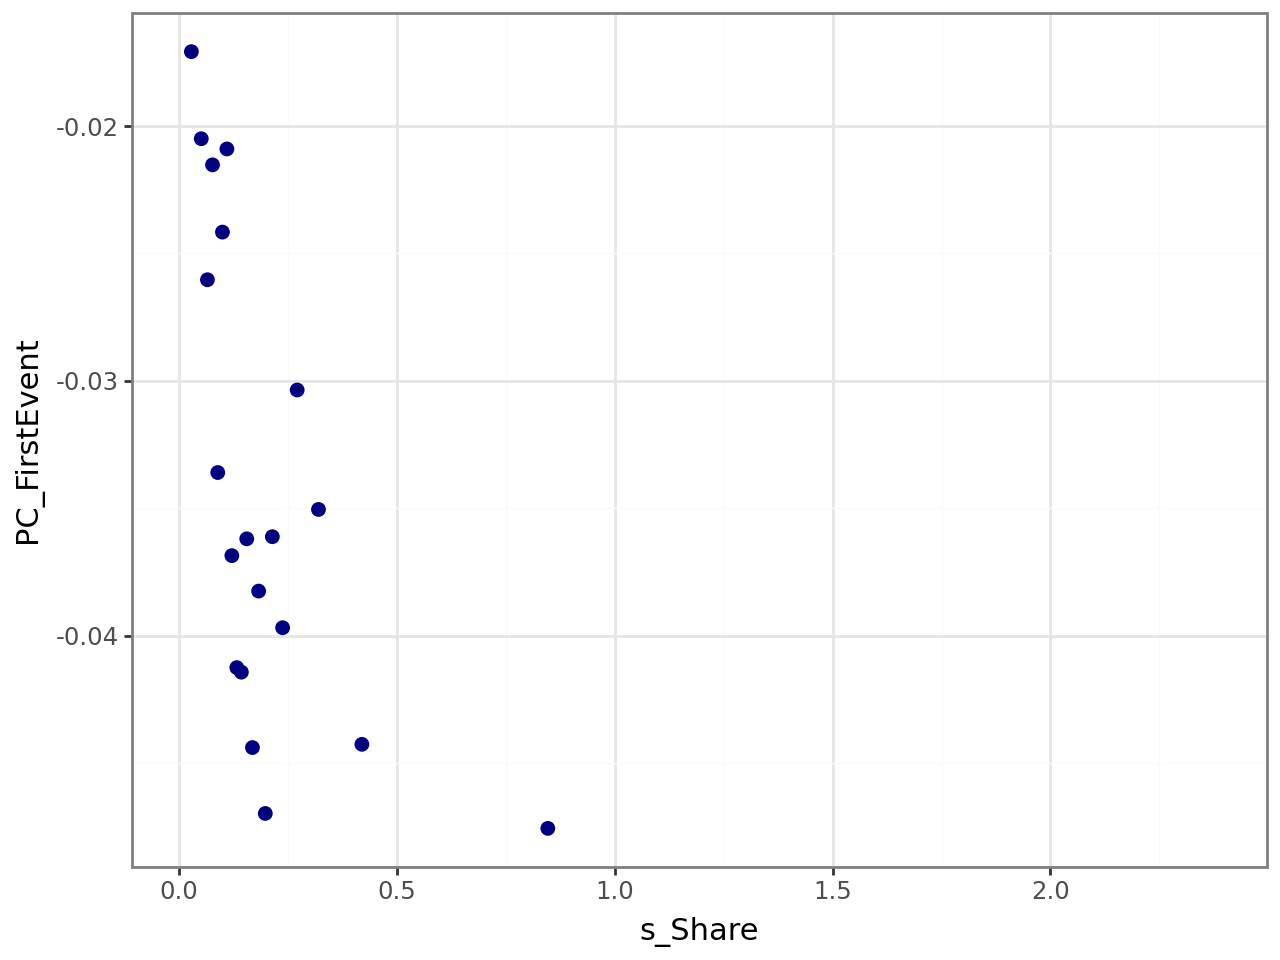

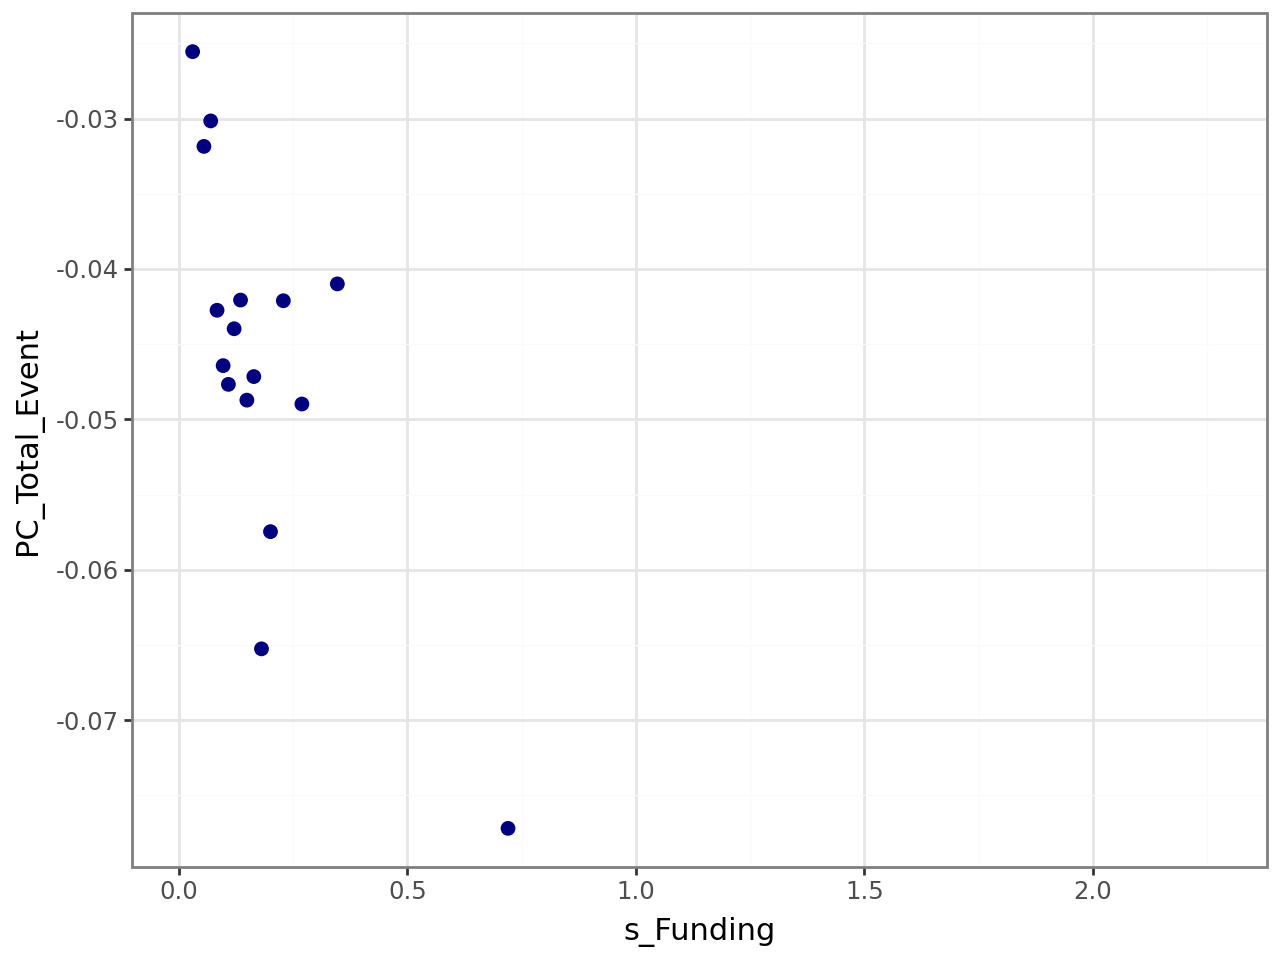

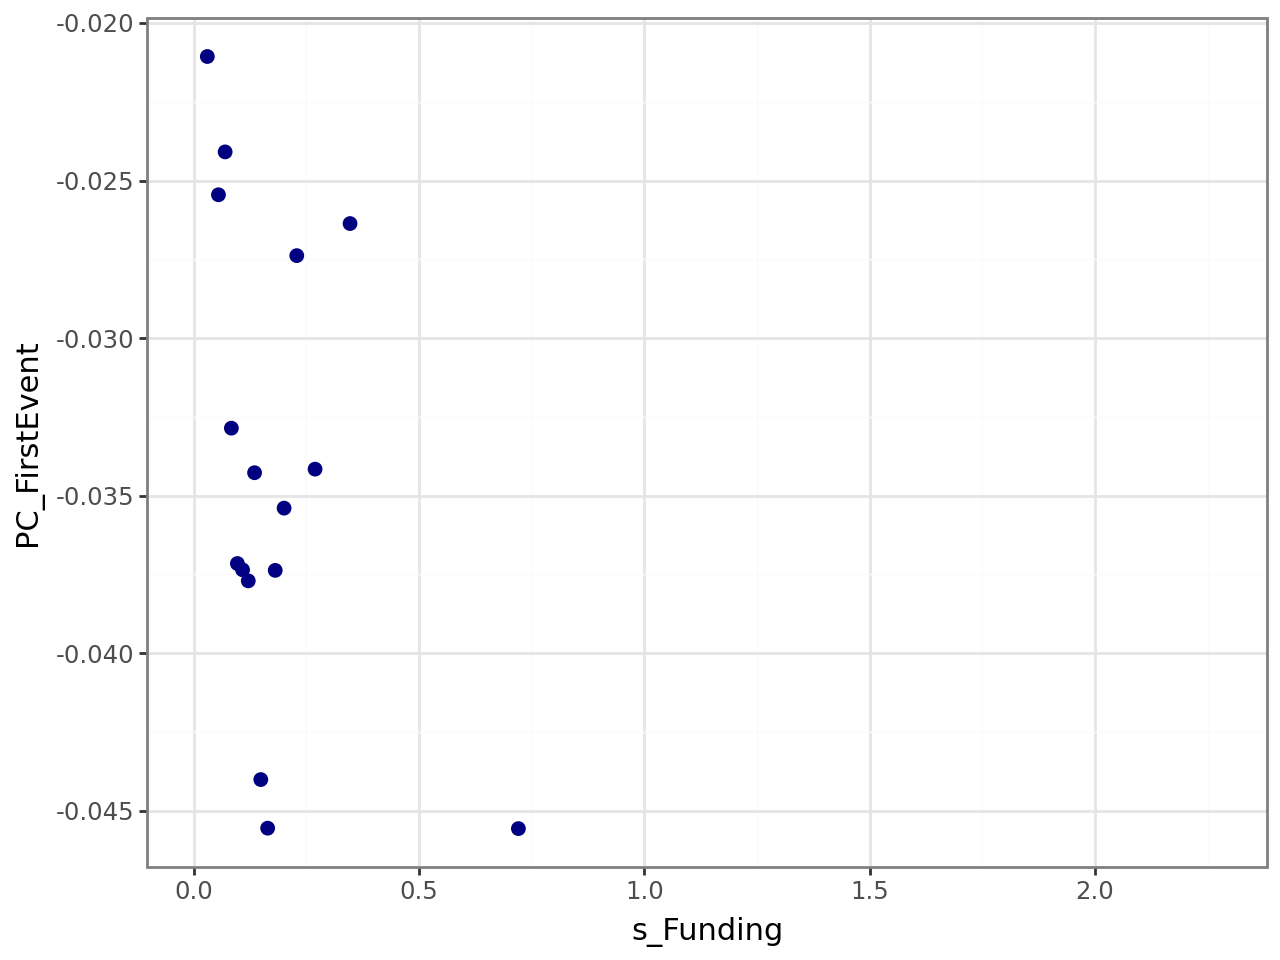

In [19]:
PairList = [(xx, yy) for xx in ['s_Share', 's_Funding'] for yy in ['PC_Total_Event', 'PC_FirstEvent']]

BinScatterData = pd.concat([UnitFun_BinScatterData(DataForBinScatter, xx, yy) for xx, yy in PairList], axis=1, join='outer', keys=PairList)


In [20]:
def UnitFun_BinScatterPlot(DataForBinScatter, BinScatterData, xx, yy, XLimit=[0,1]):
    
    # Linear fitting based on the binned data
    tempdf = BinScatterData[(xx, yy)].copy().dropna()
    temp_x = tempdf['x']
    temp_y = tempdf['fit']

    m_bin = sm.OLS(temp_y, sm.add_constant(temp_x)).fit()
    temp_y_pre = m_bin.predict(sm.add_constant(temp_x))
    coef_bin = m_bin.params['x']

    # Linear fitting based on the original data
    temp_df_orig = DataForBinScatter.loc[:, [xx, yy]].dropna().copy().sort_values(by=xx)
    temp_x_orig = temp_df_orig[xx] 
    temp_y_orig = temp_df_orig[yy]

    m_orig = sm.OLS(temp_y_orig, sm.add_constant(temp_x_orig)).fit()
    temp_y_orig_pre = m_orig.predict(sm.add_constant(temp_x_orig))
    coef_orig = m_orig.params[xx]

    Fig = MyGR.Setup_Fig()
    ax = Fig.add_subplot(1,1,1)
    ax.scatter(temp_x, temp_y, s=3, color=MyGR.MyColor('Blue'))
    MyGR.Line(Width=2).Plot(temp_x, temp_y_pre, ax=ax, Label="Regression line: binned data, coef={:.3g}".format(coef_bin))
    MyGR.Line(Width=2, Color=MyGR.MyColor('Red')).Plot(temp_x_orig, temp_y_orig_pre, ax=ax, Label="Regression line: original data, coef={:.3g}".format(coef_orig))
    ax.set_xlim(XLimit)
    YMin = min(temp_y.loc[temp_x<=1].min(), temp_y_pre.loc[temp_x<=1].min(), temp_y_orig_pre.loc[temp_x_orig<=1].min())
    YMax = max(temp_y.loc[temp_x<=1].max(), temp_y_pre.loc[temp_x<=1].max(), temp_y_orig_pre.loc[temp_x_orig<=1].max())
    ax.set_ylim([YMin-0.005, YMax+0.005])
    plt.legend(loc='upper right', fontsize=6)
    ax.set_xlabel(r's', fontsize=8) 
    ax.set_ylabel(r'$\Delta p$', fontsize=8)
    ax.tick_params(axis='both', labelsize=5)
    MyGR.Setup_Ax(ax, XTickNbins=10, YTickNbins=10)

    plt.tight_layout()

    return Fig, ax

In [21]:
for xx in ['s_Share', 's_Funding']:
    for yy in ['PC_Total_Event', 'PC_FirstEvent']:
        Fig, ax = UnitFun_BinScatterPlot(DataForBinScatter, BinScatterData, xx, yy, XLimit=[0,1])
        Fig.savefig(OutputFolder+'BinScatter_'+xx+'_'+yy+'.eps', format='eps', dpi=1000)

C:\Users\XingGuo\AppData\Local\Temp\ipykernel_18296\1662159081.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
C:\Users\XingGuo\AppData\Local\Temp\ipykernel_18296\1662159081.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
C:\Users\XingGuo\AppData\Local\Temp\ipykernel_18296\1662159081.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
C:\Users\XingGuo\AppData\Local\Temp\ipykernel_18296\1662159081.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.


### Winsorized version: drop the outliner with issuance size above 0.4

In [22]:
tempDS = DataForBinScatter.loc[DataForBinScatter['s_Share']<=0.5, :].copy()

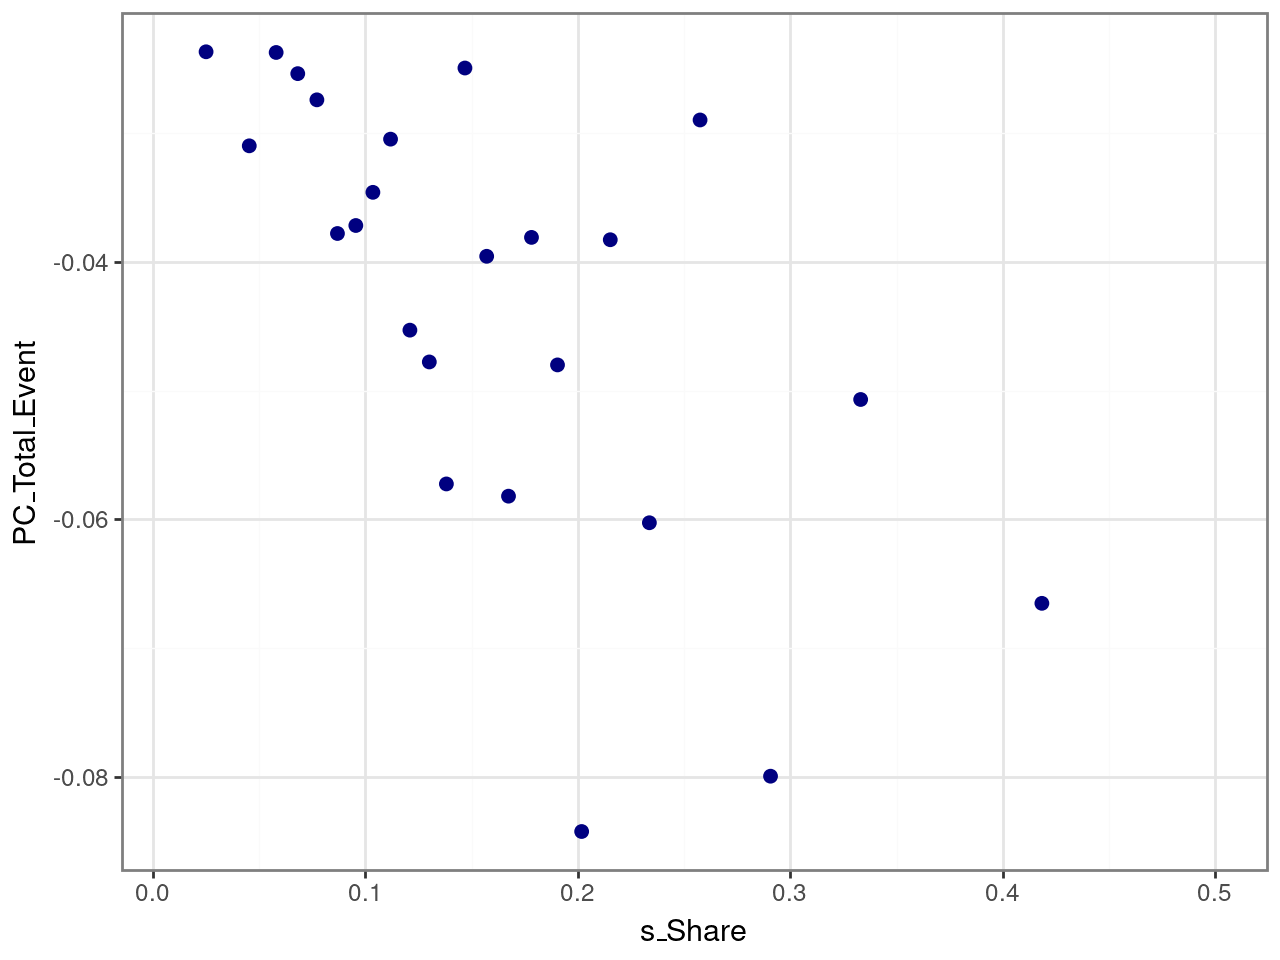

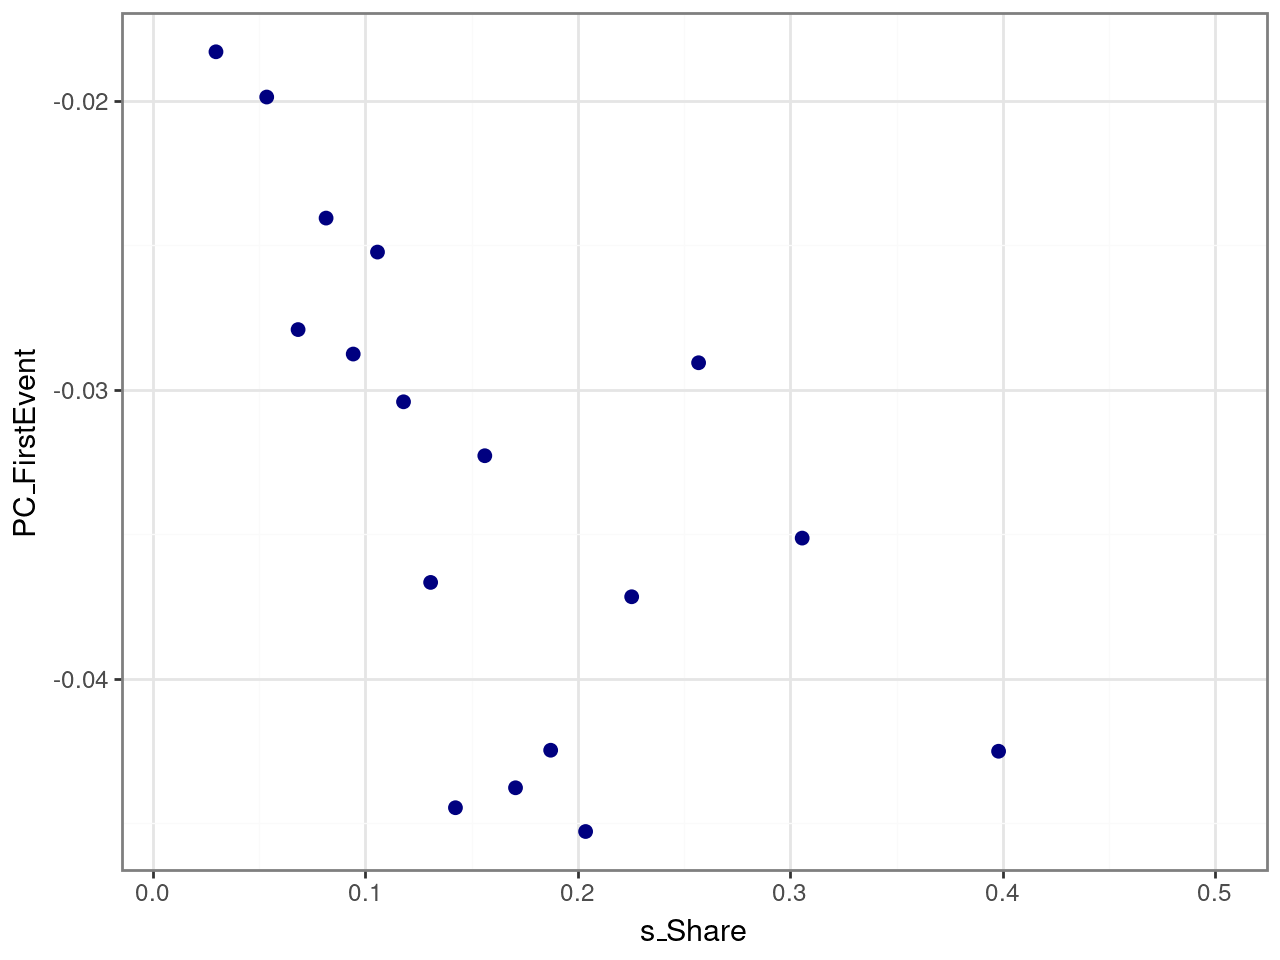

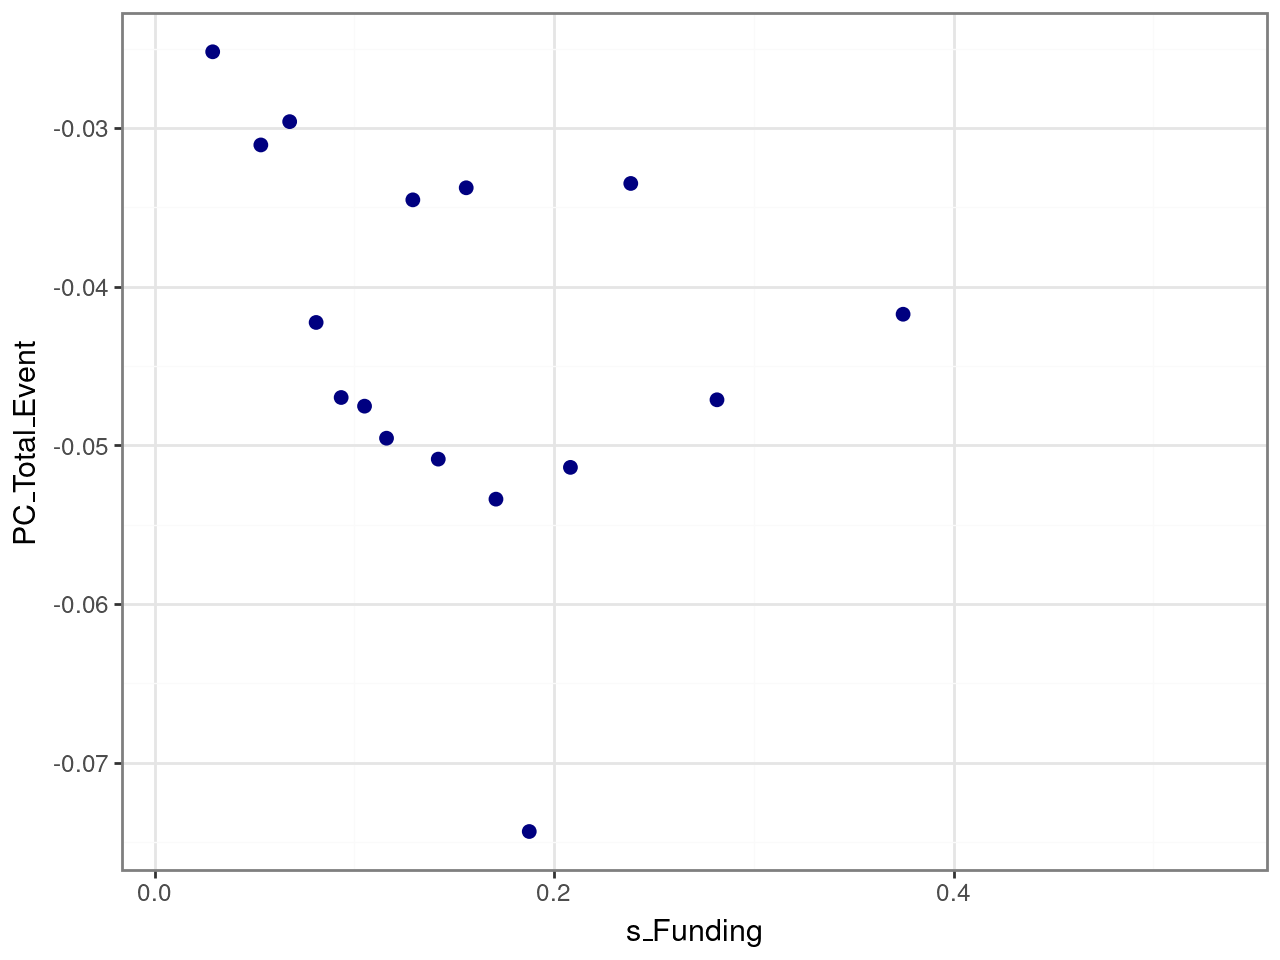

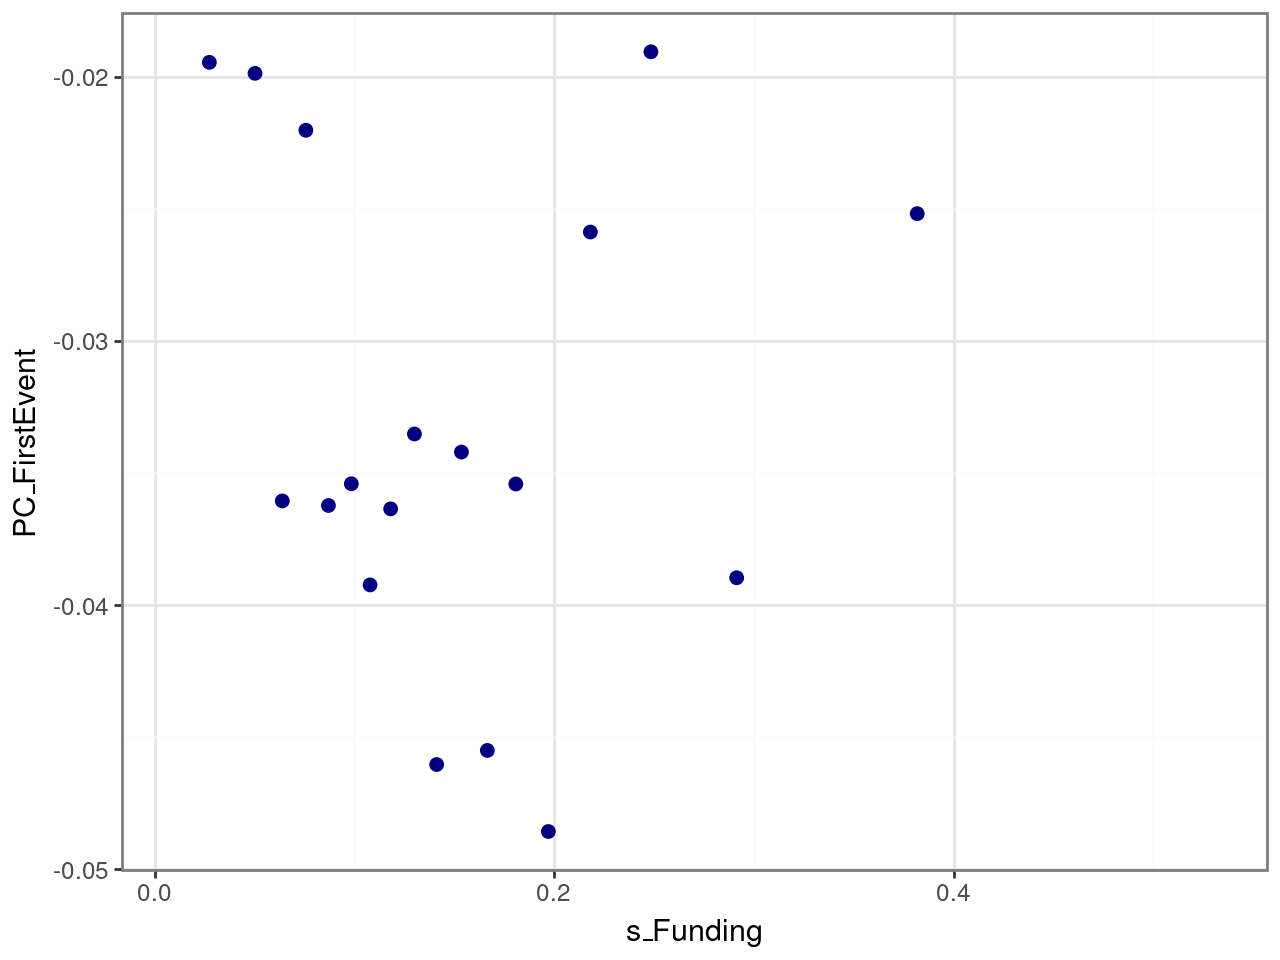

In [23]:
PairList = [(xx, yy) for xx in ['s_Share', 's_Funding'] for yy in ['PC_Total_Event', 'PC_FirstEvent']]

BinScatterData = pd.concat([UnitFun_BinScatterData(tempDS, xx, yy) for xx, yy in PairList], axis=1, join='outer', keys=PairList)


In [24]:
for xx in ['s_Share', 's_Funding']:
    for yy in ['PC_Total_Event', 'PC_FirstEvent']:
        Fig, ax = UnitFun_BinScatterPlot(tempDS, BinScatterData, xx, yy, XLimit=[0,0.4])
        plt.savefig(OutputFolder+'BinScatter_'+xx+'_'+yy+'_NoOutliner.eps', format='eps', dpi=1000)

C:\Users\XingGuo\AppData\Local\Temp\ipykernel_18296\1662159081.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
C:\Users\XingGuo\AppData\Local\Temp\ipykernel_18296\1662159081.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
C:\Users\XingGuo\AppData\Local\Temp\ipykernel_18296\1662159081.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
C:\Users\XingGuo\AppData\Local\Temp\ipykernel_18296\1662159081.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.


## Runup vs. Price change

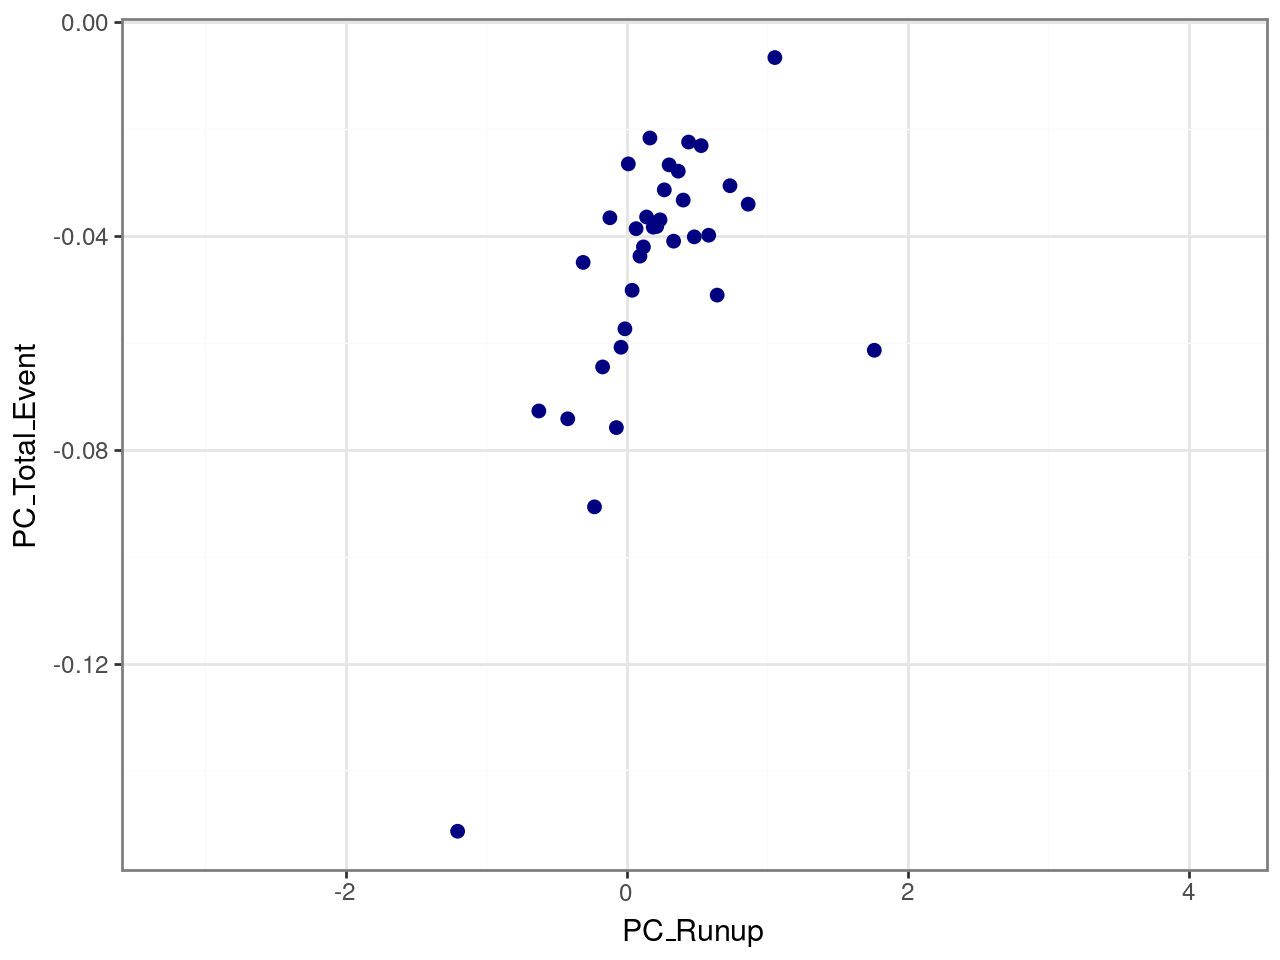

,x,fit
0,-1.205019,-0.151372
1,-0.627103,-0.072767
2,-0.421515,-0.074236
3,-0.311769,-0.044984
4,-0.230992,-0.090704
5,-0.173181,-0.064534
6,-0.121468,-0.036637
7,-0.075229,-0.075878
8,-0.042308,-0.060852
9,-0.014446,-0.057405


In [25]:
UnitFun_BinScatterData(DataForBinScatter, 'PC_Runup', 'PC_Total_Event')

# Time-series of average price drop

In [26]:
TempVarList = ['PC_Total_Event', 'PC_FirstEvent', 's_Share', 's_Funding', 'PC_Runup']

TempStat = DS[TempVarList].describe(percentiles=PctList)
TempStat 

,PC_Total_Event,PC_FirstEvent,s_Share,s_Funding,PC_Runup
count,3510.000000,3510.000000,3411.000000,3405.000000,3510.000000
mean,-0.045290,-0.033685,18.435262,0.228983,0.202190
std,0.124770,0.091525,982.017991,1.050107,0.518478
min,-1.417302,-0.567984,0.000000,0.000016,-3.220123
0.5%,-0.542494,-0.400664,0.007451,0.009991,-1.541779
1%,-0.435046,-0.344860,0.013844,0.014423,-1.277270
5%,-0.248144,-0.178514,0.039829,0.038131,-0.559331
10%,-0.174237,-0.127032,0.057228,0.055638,-0.318454
25%,-0.095310,-0.068264,0.093640,0.088899,-0.039414
50%,-0.032889,-0.024989,0.148774,0.141440,0.178280


In [27]:
# Winsorize the data 
TempFlag = True 
for vv in ['s_Share', 's_Funding']:
    if TempFlag:
        SampleFlag = DS[vv].between(TempStat.loc['0.5%', vv], TempStat.loc['99.5%', vv])
        TempFlag = False
    else:
        SampleFlag = SampleFlag & DS[vv].between(TempStat.loc['0.5%', vv], TempStat.loc['99.5%', vv])

In [28]:
DS['FirstEvent_Quarter'] = DS['FilingDate_Quarter']
DS.loc[DS['ShelfIssueFlag'] == 1, 'FirstEvent_Quarter'] = DS.loc[DS['ShelfIssueFlag'] == 1, 'LaunchDate_Quarter']

In [29]:
def UnitFun_GenDataForPlot(DS, RetVar, WeightVar, DateVar, Scale=100):
    DataForPlot = pd.concat([DS.groupby(DateVar)[RetVar].mean().sort_index().rename('PriceChange_Avg'), \
                         DS.groupby(DateVar).apply(WeightedMean, [RetVar], WeightVar, include_groups=False) \
                            .sort_index()[RetVar].rename('PriceChange_WAvg')], \
                        axis=1).sort_index() * Scale
    DataForPlot.index = pd.to_datetime(DataForPlot.index)
    return DataForPlot

def UnitFun_PlotRetBusinessCycle(DataForPlot):
    Fig = MyGR.Setup_Fig()
    ax = Fig.add_subplot(1,1,1)
    MyGR.Line(Width=2).Plot(DataForPlot.index, DataForPlot['PriceChange_WAvg'], ax=ax, Label="Price change: weighted")
    MyGR.Line(Color="Blue", Style="dashed", Width=1).Plot(DataForPlot.index, DataForPlot['PriceChange_Avg'], ax=ax, Label="Price change: non-weighted")

    ax.set_xlim([datetime.date(1983,1,1),datetime.date(2015,12,31)])
    ax.set_ylabel('Percent', fontsize=8) 
    ax.set_xlabel('Year', fontsize=8)
    ax.tick_params(axis='both', labelsize=5)
    MyGR.NBER_RecessionBar(ax)
    MyGR.Setup_Ax(ax, XDateFlag=True, XTickNbins=10)
    plt.legend(loc='lower left', fontsize=6)

    plt.tight_layout()

    return Fig, ax

## Generate the data for plots

In [30]:
DataForPlotDict = {}
for DataVar in ['IssueDate_Quarter', 'FirstEvent_Quarter']:
    DataForPlotDict[DataVar] = {}
    for RetVar in ['PC_Total_Event', 'PC_FirstEvent']:
        DataForPlot = UnitFun_GenDataForPlot(DS.loc[SampleFlag, :], RetVar, 's_Funding', DataVar)
        DataForPlotDict[DataVar][RetVar] = DataForPlot
   

In [31]:
TempVarList_Date = ['IssueDate_Quarter', 'FirstEvent_Quarter']
TempVarList_Ret = ['PC_Total_Event', 'PC_FirstEvent']
TempIdx = pd.MultiIndex.from_product([TempVarList_Date, TempVarList_Ret], names=['DateVar', 'RetVar'])
AvgPriceChangeStat = pd.concat([DataForPlotDict[Idx[0]][Idx[1]].mean() for Idx in TempIdx], axis=1, join='outer', keys=TempIdx)
AvgPriceChangeStat

DateVar          IssueDate_Quarter               FirstEvent_Quarter  \
RetVar              PC_Total_Event PC_FirstEvent     PC_Total_Event   
PriceChange_Avg          -4.029129     -3.042763          -3.942278   
PriceChange_WAvg         -4.748459     -3.280541          -4.624296   

DateVar                         
RetVar           PC_FirstEvent  
PriceChange_Avg      -3.098570  
PriceChange_WAvg     -3.332168

In [32]:
AvgPriceChangeStat.to_latex(OutputFolder+'AvgPriceChangeStat.tex', float_format="%.3g", escape=True)

## Plots

In [33]:
RetVarList = ['PC_NonExcl_F', 'PC_Total_Event_FF1_PostEvent_F']

In [34]:
DataForPlotDict = {}
for DataVar in ['IssueDate_Quarter', 'FirstEvent_Quarter']:
    DataForPlotDict[DataVar] = {}
    for RetVar in RetVarList:
        DataForPlot = UnitFun_GenDataForPlot(DS.loc[SampleFlag, :], RetVar, 's_Funding', DataVar)
        DataForPlotDict[DataVar][RetVar] = DataForPlot
   

In [35]:
TempVarList_Date = ['IssueDate_Quarter', 'FirstEvent_Quarter']
TempVarList_Ret = RetVarList
TempIdx = pd.MultiIndex.from_product([TempVarList_Date, TempVarList_Ret], names=['DateVar', 'RetVar'])
AvgPriceChangeStat = pd.concat([DataForPlotDict[Idx[0]][Idx[1]].mean() for Idx in TempIdx], axis=1, join='outer', keys=TempIdx)
AvgPriceChangeStat

DateVar          IssueDate_Quarter                                 \
RetVar                PC_NonExcl_F PC_Total_Event_FF1_PostEvent_F   
PriceChange_Avg          -2.014337                      -3.731307   
PriceChange_WAvg         -2.225979                      -4.356656   

DateVar          FirstEvent_Quarter                                 
RetVar                 PC_NonExcl_F PC_Total_Event_FF1_PostEvent_F  
PriceChange_Avg           -2.115076                      -3.669186  
PriceChange_WAvg          -2.303765                      -4.261565

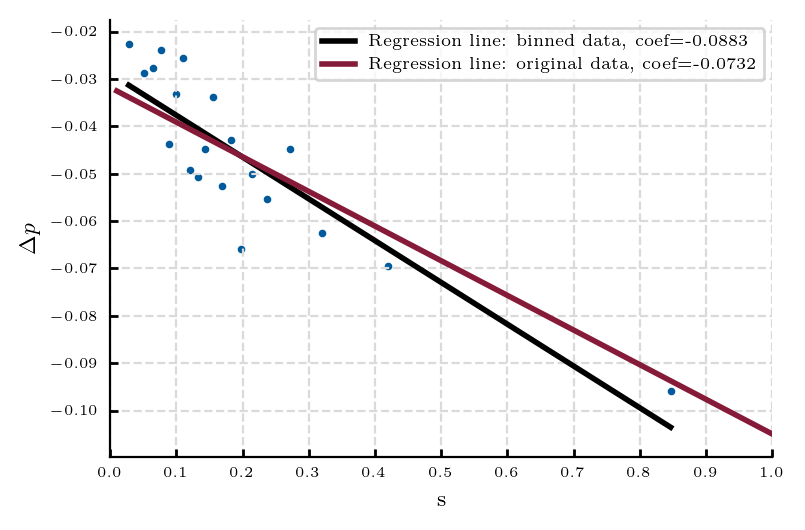

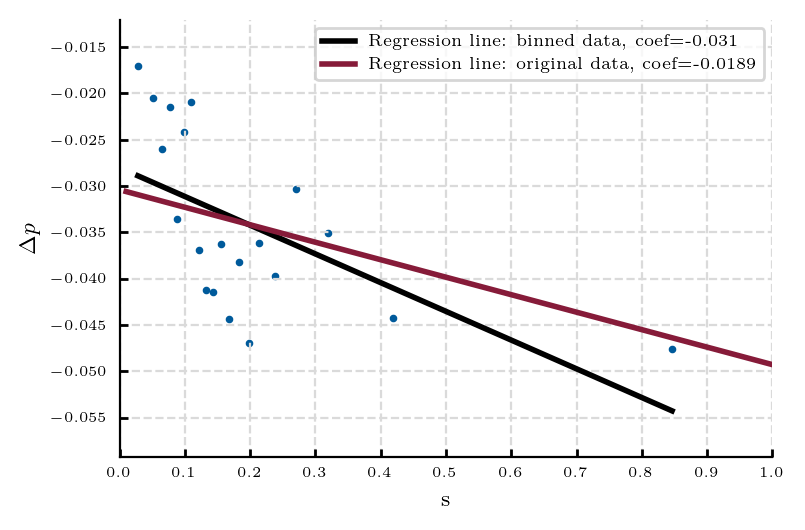

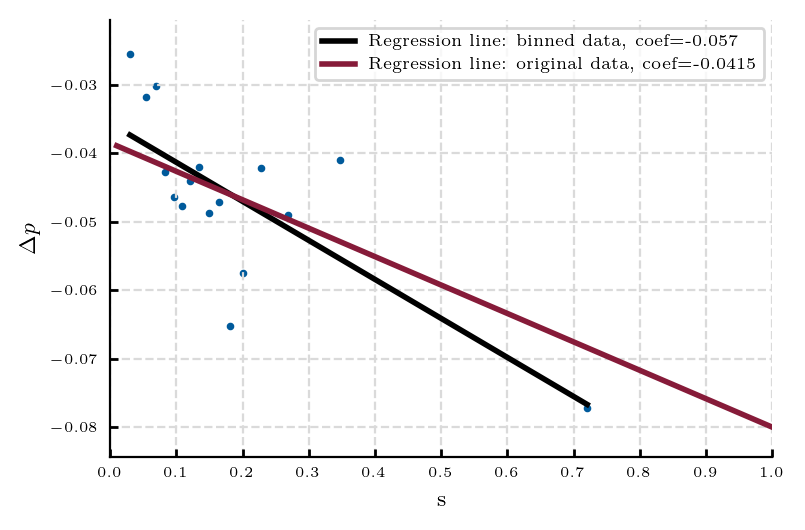

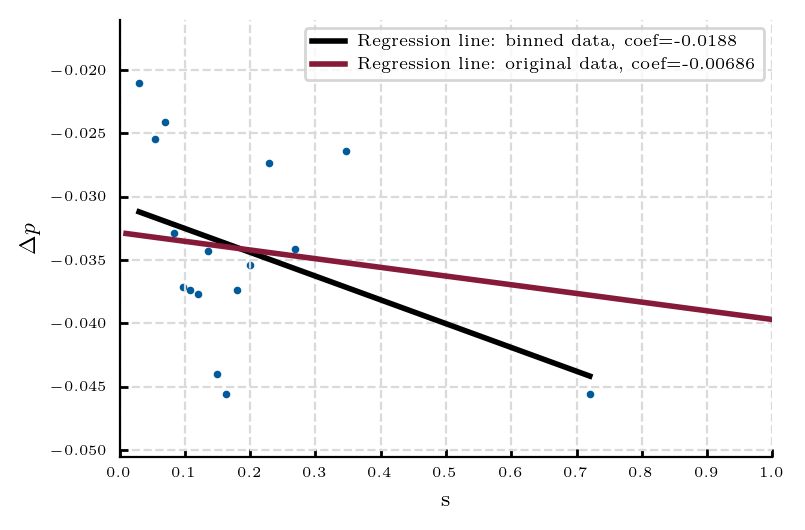

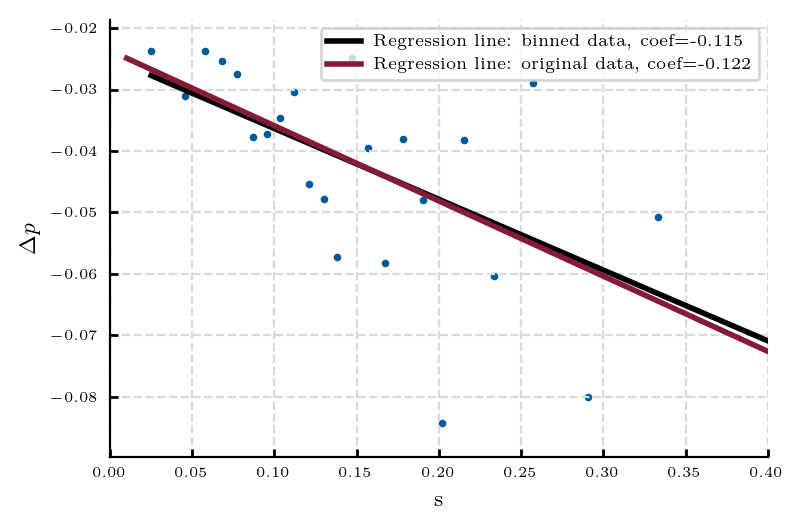

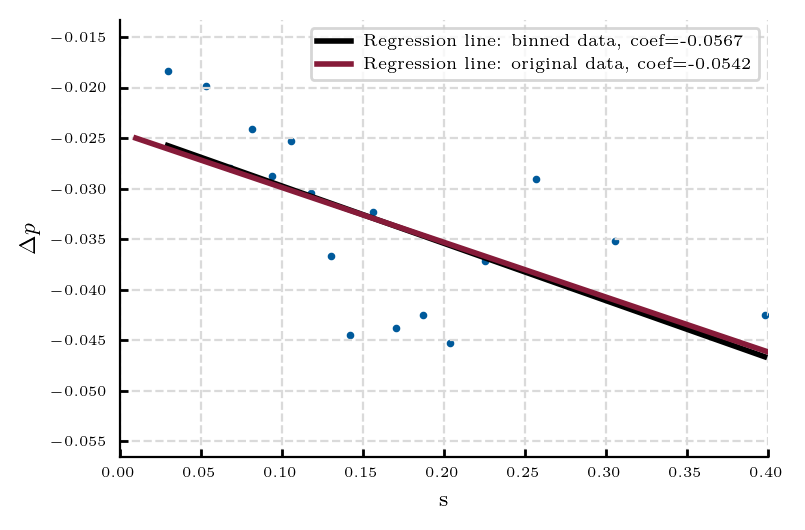

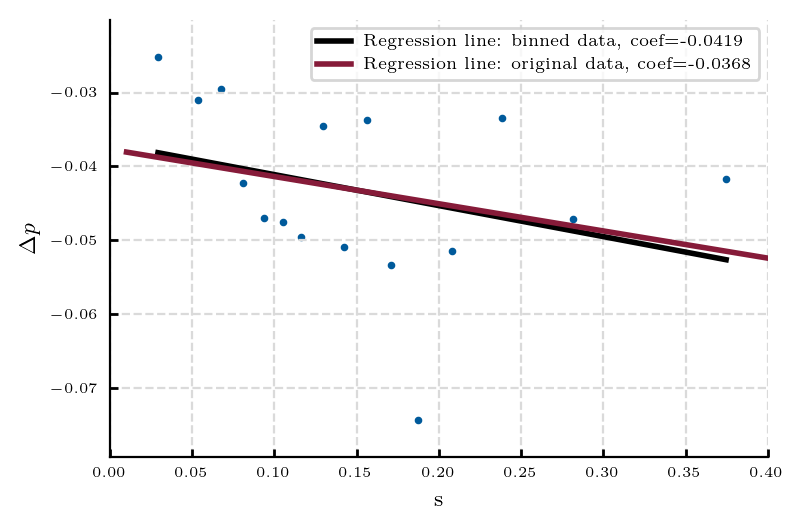

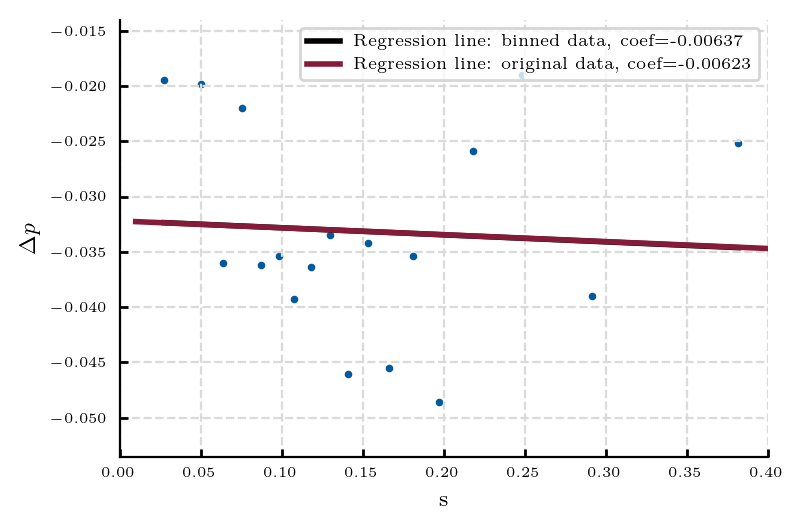

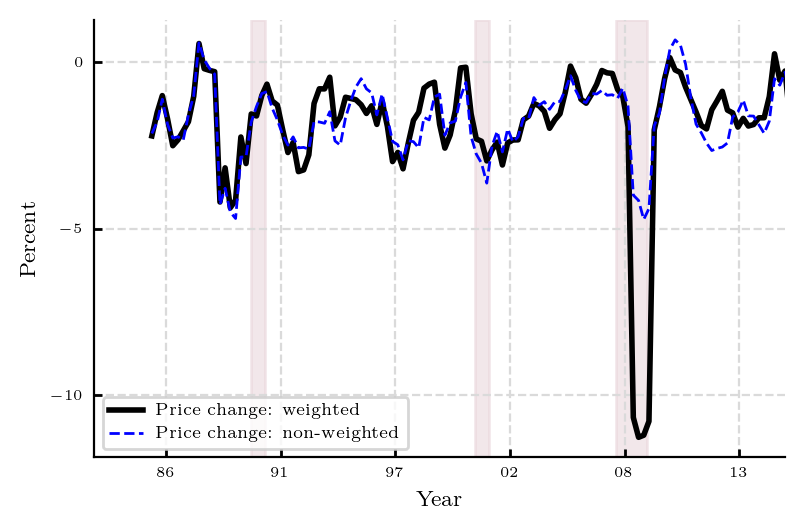

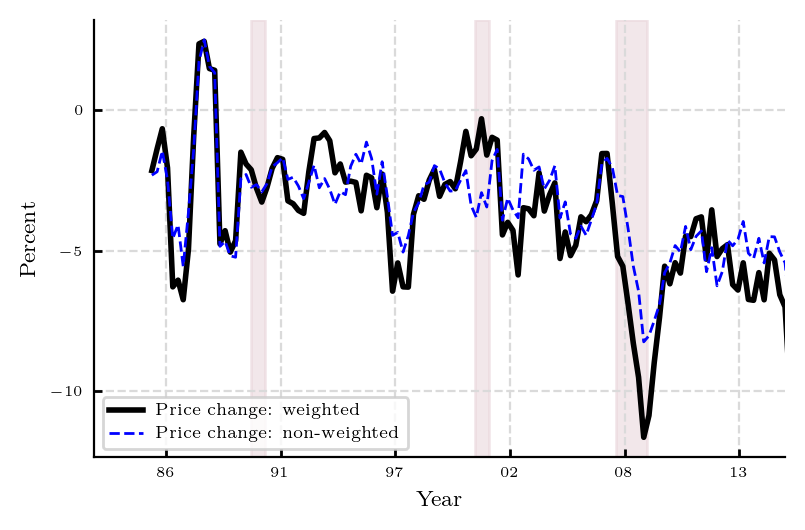

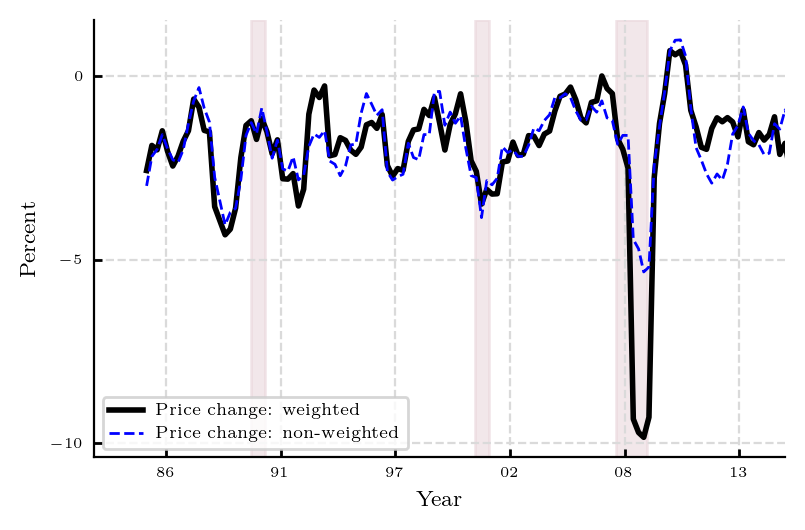

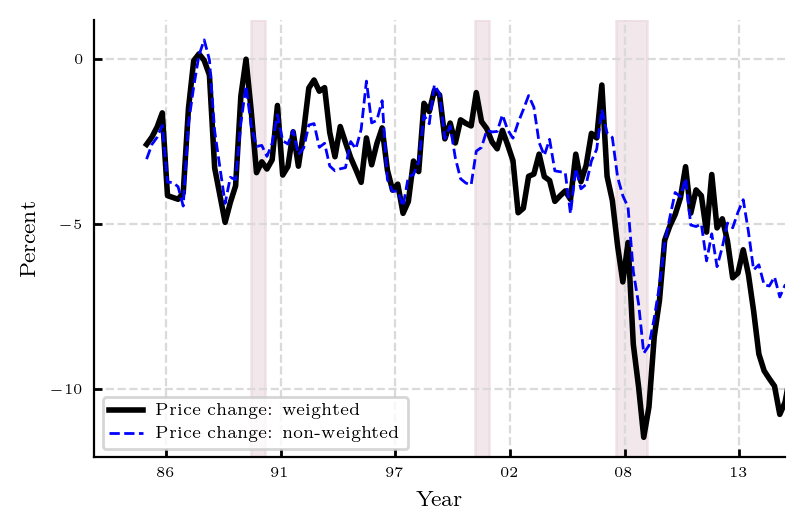

In [36]:
for DateVar in ['IssueDate_Quarter', 'FirstEvent_Quarter']:
    for RetVar in RetVarList:
        TempData = DataForPlotDict[DateVar][RetVar].copy()
        # TempData = TempData - TempData.mean()
        TempData = TempData.rolling(4).mean()
        Fig, ax = UnitFun_PlotRetBusinessCycle(TempData)
        plt.show()
        # Fig.savefig(OutputFolder+'/BusinessCycle_PriceChange_'+DateVar+'_'+RetVar+'.eps', format='eps', dpi=1000)              

# Checks for the business cycle plot

## HP filter

## Original measurement 

In [37]:
Var_F = 'PC_NonExcl_F'+'_FF1_PostEvent_F'
Var_I = 'PC_NonExcl_I'+'_FF1_PostEvent_I'
DS['PC_PreVersion'] = DS[Var_F]
DS['Date_PreVersion'] = DS['FilingDate_Quarter']
DS.loc[DS['ShelfIssueFlag'] == 1, 'PC_PreVersion'] = DS.loc[DS['ShelfIssueFlag'] == 1, Var_I]
DS.loc[DS['ShelfIssueFlag'] == 1, 'Date_PreVersion'] = DS.loc[DS['ShelfIssueFlag'] == 1, 'IssueDate_Quarter']



In [38]:
RetVar = 'PC_PreVersion'
DateVar = 'Date_PreVersion'


In [47]:
def UnitFun_KeyPriceChangeResults(DS, RetVar, DateVar):
    # Step 0. Winsorize the data 
    TempVarList = [RetVar, 's_Share', 's_Funding']

    TempStat = DS[TempVarList].describe(percentiles=PctList)

    TempFlag = True 
    for vv in TempVarList:
        if TempFlag:
            SampleFlag = DS[vv].between(TempStat.loc['0.5%', vv], TempStat.loc['99.5%', vv])
            TempFlag = False
        else:
            SampleFlag = SampleFlag & DS[vv].between(TempStat.loc['0.5%', vv], TempStat.loc['99.5%', vv])
    # Step 1. Summary statistics of price change 
    SumStat = KeyRetStat(DS.loc[SampleFlag, RetVar])

    # Step 2. Binscatter plot 
    DataForBinScatter = DS.loc[SampleFlag, :]
    DataForBinScatter = DataForBinScatter.loc[DataForBinScatter['s_Share']<=0.5, :]

    PairList = [(xx, yy) for xx in ['s_Share',] for yy in [RetVar,]]
    BinScatterData = pd.concat([UnitFun_BinScatterData(DataForBinScatter, xx, yy) for xx, yy in PairList], axis=1, join='outer', keys=PairList)
    Fig_BinScatter, ax_BinScatter = UnitFun_BinScatterPlot(DataForBinScatter, BinScatterData, 's_Share', RetVar, XLimit=[0,0.5])

    # Step 3. Business cycle plot 
    DataForPlot = UnitFun_GenDataForPlot(DS.loc[SampleFlag, :], RetVar, 's_Funding', DateVar)
    AvgPriceChangeStat = DataForPlot.mean()

    TempData = DataForPlot.rolling(4).mean()
    Fig_BusCycle, ax_BusCycle = UnitFun_PlotRetBusinessCycle(TempData)

    KeyResult = {'SumStat': SumStat, 'BinScatterPlot': Fig_BinScatter, \
                'BusinessCyclePlot': Fig_BusCycle, 'AvgPriceChangeStat': AvgPriceChangeStat}

    return KeyResult


In [ ]:
temp_RetVarList = [x1+'_'+x2 for x1 in ['PC_Total_Event', 'PC_FirstEvent'] for x2 in ['FF5_PreEvent_F', 'FF5_PostEvent_I']]
temp_DateVarList = ['IssueDate_Quarter', 'FirstEvent_Quarter']
RetDatePairList = [('PC_PreVersion', 'Date_PreVersion'),] + \
                  [(xx, yy) for xx in temp_RetVarList for yy in temp_DateVarList]

RetDatePairList

[('PC_PreVersion', 'Date_PreVersion'),
 ('PC_Total_Event_FF5_PreEvent_F', 'IssueDate_Quarter'),
 ('PC_Total_Event_FF5_PreEvent_F', 'FirstEvent_Quarter'),
 ('PC_Total_Event_FF5_PostEvent_I', 'IssueDate_Quarter'),
 ('PC_Total_Event_FF5_PostEvent_I', 'FirstEvent_Quarter'),
 ('PC_FirstEvent_FF5_PreEvent_F', 'IssueDate_Quarter'),
 ('PC_FirstEvent_FF5_PreEvent_F', 'FirstEvent_Quarter'),
 ('PC_FirstEvent_FF5_PostEvent_I', 'IssueDate_Quarter'),
 ('PC_FirstEvent_FF5_PostEvent_I', 'FirstEvent_Quarter')]

In [ ]:
ResultDict = {}
for temp in RetDatePairList:
    RetVar = temp[0]
    DateVar = temp[1]
    ResultDict[temp] = UnitFun_KeyPriceChangeResults(DS, RetVar, DateVar)

    ResultDict[temp]['BinScatterPlot'].savefig(OutputFolder+'/Experiment_BinScatter_'+RetVar+'_'+DateVar+'.eps', format='eps', dpi=1000)
    ResultDict[temp]['BusinessCyclePlot'].savefig(OutputFolder+'/Experiment_BusinessCycle_'+RetVar+'_'+DateVar+'.eps', format='eps', dpi=1000)



In [61]:
temp = pd.concat([ResultDict[vv]['SumStat'] for vv in ResultDict.keys()], axis=1, join='outer', keys=ResultDict.keys())

temp.to_excel(OutputFolder+'/Experiment_SumStat.xlsx')

In [64]:
temp = pd.concat([ResultDict[vv]['AvgPriceChangeStat'] for vv in ResultDict.keys()], axis=1, join='outer', keys=ResultDict.keys()).T

temp.to_excel(OutputFolder+'/Experiment_AvgPriceChangeStat.xlsx')